# Exploring Image Classification of Artwork

This project explores various image classification methods to categorize artwork by artistic style. We aim to identify styles such as Pop Art, Realism, Baroque, and others using techniques like Convolutional Neural Networks (CNNs), data augmentation, and the ResNet50 model. Our goal is to evaluate these methods and determine which yields the most accurate classification results.

Our dataset currently contains 81444 unique images from 1119 different artists in 27 styles

## Import Dataset



In [ ]:
pip install kaggle

In [ ]:
import kagglehub

# Download WikiArt dataset
path = kagglehub.dataset_download("steubk/wikiart")

print("Path to dataset files:", path)
path = kagglehub.dataset_download("steubk/wikiart")

print(path)

100%|██████████| 31.4G/31.4G [24:57<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/steubk/wikiart/versions/1
/root/.cache/kagglehub/datasets/steubk/wikiart/versions/1


In [ ]:
# View files in Wikiart
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dataset_path = path
dataset_length = len(os.listdir(dataset_path))
print(f"The dataset contains {dataset_length} items.")
items = os.listdir(path)
print(items)

The dataset contains 29 items.
['Analytical_Cubism', 'New_Realism', 'classes.csv', 'Expressionism', 'Pop_Art', 'wclasses.csv', 'Mannerism_Late_Renaissance', 'Northern_Renaissance', 'Rococo', 'Abstract_Expressionism', 'Fauvism', 'Baroque', 'Ukiyo_e', 'Art_Nouveau_Modern', 'High_Renaissance', 'Cubism', 'Naive_Art_Primitivism', 'Symbolism', 'Early_Renaissance', 'Post_Impressionism', 'Action_painting', 'Contemporary_Realism', 'Impressionism', 'Pointillism', 'Color_Field_Painting', 'Synthetic_Cubism', 'Romanticism', 'Minimalism', 'Realism']


In [ ]:
all_items = os.listdir(path)
print(all_items)
files = [item for item in all_items if os.path.isfile(os.path.join(path, item))]
folders = [item for item in all_items if os.path.isdir(os.path.join(path, item))]

print("Files:", files)
print("Folders:", folders)

['Analytical_Cubism', 'New_Realism', 'classes.csv', 'Expressionism', 'Pop_Art', 'wclasses.csv', 'Mannerism_Late_Renaissance', 'Northern_Renaissance', 'Rococo', 'Abstract_Expressionism', 'Fauvism', 'Baroque', 'Ukiyo_e', 'Art_Nouveau_Modern', 'High_Renaissance', 'Cubism', 'Naive_Art_Primitivism', 'Symbolism', 'Early_Renaissance', 'Post_Impressionism', 'Action_painting', 'Contemporary_Realism', 'Impressionism', 'Pointillism', 'Color_Field_Painting', 'Synthetic_Cubism', 'Romanticism', 'Minimalism', 'Realism']
Files: ['classes.csv', 'wclasses.csv']
Folders: ['Analytical_Cubism', 'New_Realism', 'Expressionism', 'Pop_Art', 'Mannerism_Late_Renaissance', 'Northern_Renaissance', 'Rococo', 'Abstract_Expressionism', 'Fauvism', 'Baroque', 'Ukiyo_e', 'Art_Nouveau_Modern', 'High_Renaissance', 'Cubism', 'Naive_Art_Primitivism', 'Symbolism', 'Early_Renaissance', 'Post_Impressionism', 'Action_painting', 'Contemporary_Realism', 'Impressionism', 'Pointillism', 'Color_Field_Painting', 'Synthetic_Cubism', '

In [ ]:
import tensorflow as tf

# Set parameters
dataset_path = path
img_size = (224, 224)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# Load dataset unbatched
full_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=None,
    shuffle=True,
    seed=42
)

# Count total samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

# Split dataset
train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size)

# Normalize, batch, and prefetch
def normalize_img(img, label):
    return tf.cast(img, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img).batch(batch_size).cache().shuffle(1000).prefetch(AUTOTUNE)
val_dataset = val_dataset.map(normalize_img).batch(batch_size).cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.map(normalize_img).batch(batch_size).cache().prefetch(AUTOTUNE)

# ✅ Get class names
class_names = full_dataset.class_names
print("✅ Classes:", class_names)
print(f"Train: {train_size}, Val: {val_size}, Test: {test_size}")


Found 81444 files belonging to 27 classes.
✅ Classes: ['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau_Modern', 'Baroque', 'Color_Field_Painting', 'Contemporary_Realism', 'Cubism', 'Early_Renaissance', 'Expressionism', 'Fauvism', 'High_Renaissance', 'Impressionism', 'Mannerism_Late_Renaissance', 'Minimalism', 'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e']
Train: 57010, Val: 12216, Test: 12218


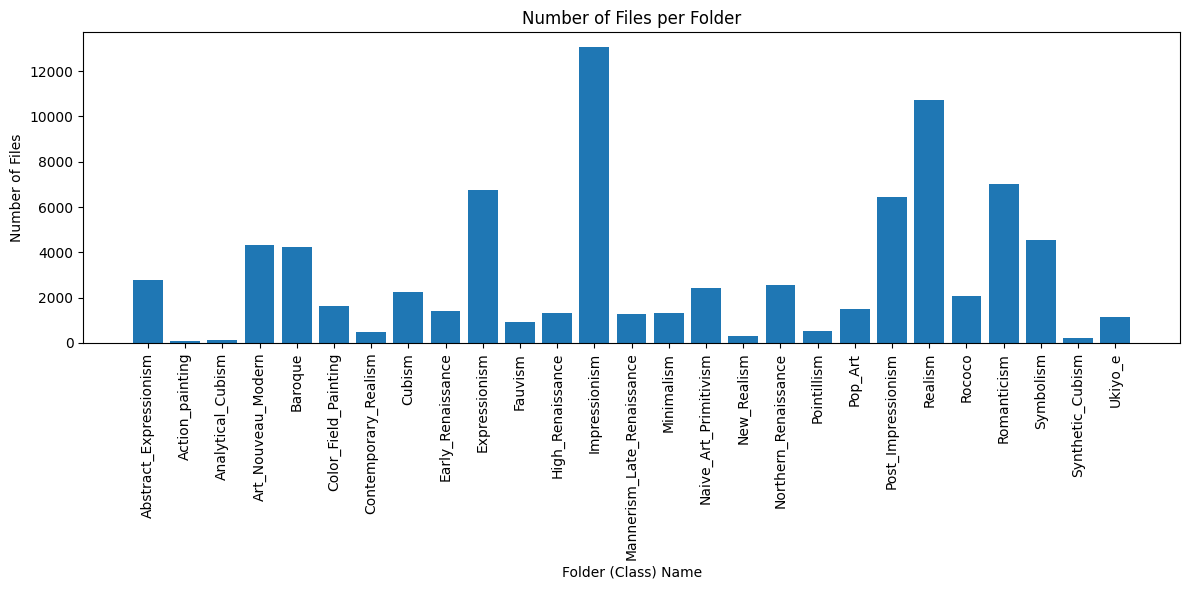

In [ ]:
# Create a dictionary to hold the counts
folder_counts = {}

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        num_files = len([
            name for name in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, name))
        ])
        folder_counts[folder_name] = num_files

folder_names = sorted(folder_counts.keys())
counts = [folder_counts[name] for name in folder_names]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(folder_names, counts)
plt.xlabel('Folder (Class) Name')
plt.ylabel('Number of Files')
plt.title('Number of Files per Folder')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
def show_images_simple(dataset, class_names, num_images=5):
    plt.figure(figsize=(15, 3))

    images_shown = 0
    for data in dataset.take(num_images):
        if isinstance(data, tuple):
            image, label = data
        else:
            image = data[0]
            label = data[1]
        if image.shape.ndims == 4:
            image = image[0]
            label = label[0]

        plt.subplot(1, num_images, images_shown + 1)
        ax = plt.gca()
        ax.set_xlim([0, 200])
        ax.set_ylim([0, 200])
        plt.imshow(image.numpy().astype("uint8") if image.numpy().max() > 1 else image.numpy(),
                  extent=[0, 200, 0, 200])
        plt.title(class_names[label.numpy()])
        plt.axis('off')
        images_shown += 1

        if images_shown >= num_images:
            break

    plt.tight_layout()
    plt.show()

show_images_simple(train_dataset, class_names, num_images=5)

# Part 1 - Train the Model (Baseline)


*   Train Model
*   Plot the model's accuracy and error


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),


    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Build baseline
input_shape = (224, 224, 3)
baseline = model

In [ ]:
 baseline.summary()

In [ ]:
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Batch the datasets
batch_size = 16

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath="baseline.keras", save_best_only=True, monitor="val_loss")
]

history = baseline.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=callbacks
)

model_baseline_1 = model.save('baseline.keras')


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# With Classweight
Since samples of data per folder is not balanced, we wanted to add class weight to evaluate how it performs over the baseline without the classweight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

folder_names = sorted(folder_counts.keys())
counts = [folder_counts[name] for name in folder_names]

total_samples = sum(counts)
num_classes = len(folder_names)

# Create Class Weights
class_weights = {
    i: total_samples / (num_classes * count)
    for i, count in enumerate(counts)
}

print(class_weights)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_2 = keras.models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),


    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
model_2.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Build baseline
input_shape = (224, 224, 3)
baseline_2 = model_2

In [ ]:
baseline_2.summary()

In [ ]:
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Batch the datasets
batch_size = 16

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath="baseline_2.keras", save_best_only=True, monitor="val_loss")
]

history = baseline_2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=callbacks,
    class_weight=class_weights
)

model_baseline_2 = model.save('model_2.keras')



plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Part 2 - Use Data Augmentation


Data augmentation can help us manage overfitting by increasing the size of dataset through diversity.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import os

# Data Augmentation Block
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1),
    #layers.RandomTranslation(0.1, 0.1),
    #layers.RandomContrast(0.1),
], name="data_augmentation")

# Switch for Augmentation
USE_AUGMENTATION = True

# Build Model
def build_model(use_augmentation=False):
    inputs = keras.Input(shape=(224, 224, 3))
    x = inputs
    if use_augmentation:
        x = data_augmentation(x)

    x = layers.Conv2D(32, (3, 3), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)


    x = layers.Conv2D(256, (3,3), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(512, (3,3), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(27, activation='softmax')(x)

    aug_model = keras.Model(inputs, outputs)
    return aug_model

# Instantiate Model
aug_model = build_model(use_augmentation=USE_AUGMENTATION)

# Compile Model
aug_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

aug_model.summary()

# Train Model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath="baseline.keras", save_best_only=True, monitor="val_loss")
]

history = aug_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=callbacks,
)

model_aug_model = model.save('aug_model.keras')

# Plot Training Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



# Part 3 - Use Resnet50 to classify images

In [ ]:
import keras
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [ ]:
# Utility functions for data exploration and training visualization

def get_label_counts(dataset, num_classes):
    label_counts = np.zeros(num_classes, dtype=int)
    for _, labels in dataset.unbatch():
        label_counts[int(labels.numpy())] += 1
    return label_counts

def explore_data(train_dataset, val_dataset, test_dataset, class_names):
    num_classes = len(class_names)

    # Plot class distribution
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    for i, (counts, title) in enumerate(zip(
        [get_label_counts(train_dataset, num_classes),
         get_label_counts(val_dataset, num_classes),
         get_label_counts(test_dataset, num_classes)],
        ['Train Set', 'Validation Set', 'Test Set'])):

        ax[i].bar(range(num_classes), counts)
        ax[i].set_xticks(range(num_classes))
        ax[i].set_xticklabels(class_names, rotation=90)
        ax[i].set_title(title)

    plt.tight_layout()
    plt.show()

    # Sample images
    plt.figure(figsize=(10, 6))
    for images, labels in train_dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            img = images[i].numpy()
            img = (img - img.min()) / (img.max() - img.min() + 1e-5)
            plt.imshow(img)
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.tight_layout()
    plt.show()


def plot_loss(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Accuracy
    plt.plot(epochs, accuracy, "bo", label="Training acc")
    plt.plot(epochs, val_accuracy, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    # Loss
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()


In [ ]:
# Explore data
explore_data(train_dataset, val_dataset, test_dataset, class_names)

In [ ]:
# Load pretrained ResNet50 as base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze last 30 layers
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

resnet_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(27, activation='softmax')
])


optimizer = keras.optimizers.Adam(learning_rate=0.00001, clipnorm=1.0)

resnet_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_resnet = model.save("resnet_model.keras")

resnet_model.summary()

In [ ]:
# Train model

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="improved_augmented_model.keras",
        save_best_only=True,
        monitor="val_loss"
    )

history_resnet = resnet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=callbacks
)

In [ ]:
# --- Plot Training Curves ---
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate on test set

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.2%}")

In [ ]:
# Plot loss
plot_loss(history_resnet)


# Comparing New and Existing Images based on Art Genres


# Vincent Van Gogh Starry Night

In [ ]:
model1 = tf.keras.models.load_model('baseline.keras')
model1_2 = tf.keras.models.load_model('baseline_2.keras')
model2 = tf.keras.models.load_model('aug_model.keras')
model3 = tf.keras.models.load_model('resnet_model.keras')

from tensorflow.keras.preprocessing import image
import numpy as np

# Load image
img_path = '/content/image3.jpg'
img_size = (224, 224)

img = image.load_img(img_path, target_size=img_size)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

# Model predictions
pred1 = model1.predict(img_array)
pred1_2 = model1_2.predict(img_array)
pred2 = model2.predict(img_array)
pred3 = model3.predict(img_array)

# Convert probabilities to class index
class_pred1 = np.argmax(pred1, axis=1)[0]
class_pred1_2 = np.argmax(pred1_2, axis=1)[0]
class_pred2 = np.argmax(pred2, axis=1)[0]
class_pred3 = np.argmax(pred3, axis=1)[0]

# Print results
print("Model 1 prediction (index):", class_pred1)
print("Model 1 with class weights prediction (index):", class_pred1_2)
print("Model 2 prediction (index):", class_pred2)
print("Model 3 prediction (index):", class_pred3)

print("Model 1 predicts:", class_names[class_pred1])
print("Model 1 predicts:", class_names[class_pred1_2])
print("Model 2 predicts:", class_names[class_pred2])
print("Model 3 predicts:", class_names[class_pred3])


In [ ]:
model1 = tf.keras.models.load_model('baseline.keras')
model1_2 = tf.keras.models.load_model('baseline_2.keras')
model2 = tf.keras.models.load_model('aug_model.keras')
model3 = tf.keras.models.load_model('resnet_model.keras')

from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/image1.png'
img_size = (224, 224)

img = image.load_img(img_path, target_size=img_size)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

# Model predictions
pred1 = model1.predict(img_array)
pred1_2 = model1_2.predict(img_array)
pred2 = model2.predict(img_array)
pred3 = model3.predict(img_array)

# Convert probabilities to class index
class_pred1 = np.argmax(pred1, axis=1)[0]
class_pred1_2 = np.argmax(pred1_2, axis=1)[0]
class_pred2 = np.argmax(pred2, axis=1)[0]
class_pred3 = np.argmax(pred3, axis=1)[0]

# Print results
print("Model 1 prediction (index):", class_pred1)
print("Model 1 with class weights prediction (index):", class_pred1_2)
print("Model 2 prediction (index):", class_pred2)
print("Model 3 prediction (index):", class_pred3)

print("Model 1 predicts:", class_names[class_pred1])
print("Model 1 predicts:", class_names[class_pred1_2])
print("Model 2 predicts:", class_names[class_pred2])
print("Model 3 predicts:", class_names[class_pred3])


In [ ]:
model1 = tf.keras.models.load_model('baseline.keras')
model1_2 = tf.keras.models.load_model('baseline_2.keras')
model2 = tf.keras.models.load_model('aug_model.keras')
model3 = tf.keras.models.load_model('resnet_model.keras')

from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/image2.png'
img_size = (224, 224)

img = image.load_img(img_path, target_size=img_size)
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

# Model predictions
pred1 = model1.predict(img_array)
pred1_2 = model1_2.predict(img_array)
pred2 = model2.predict(img_array)
pred3 = model3.predict(img_array)

# Convert probabilities to class index
class_pred1 = np.argmax(pred1, axis=1)[0]
class_pred1_2 = np.argmax(pred1_2, axis=1)[0]
class_pred2 = np.argmax(pred2, axis=1)[0]
class_pred3 = np.argmax(pred3, axis=1)[0]

# Print results
print("Model 1 prediction (index):", class_pred1)
print("Model 1 with class weights prediction (index):", class_pred1_2)
print("Model 2 prediction (index):", class_pred2)
print("Model 3 prediction (index):", class_pred3)

print("Model 1 predicts:", class_names[class_pred1])
print("Model 1 predicts:", class_names[class_pred1_2])
print("Model 2 predicts:", class_names[class_pred2])
print("Model 3 predicts:", class_names[class_pred3])


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = []
y_pred_model1 = []
y_pred_model1_2 = []
y_pred_model2 = []
y_pred_model3 = []

class_sampled = set()

for image, label in val_dataset.unbatch():
    label = label.numpy()

    if label not in class_sampled:
        img = np.expand_dims(image.numpy(), axis=0)
        preds1 = model1.predict(img, verbose=0)
        preds1_2 = model1_2.predict(img, verbose=0)
        preds2 = model2.predict(img, verbose=0)
        preds3 = model3.predict(img, verbose=0)

        pred_labels1 = np.argmax(preds1, axis=1)[0]
        pred_labels1_2 = np.argmax(preds1_2, axis=1)[0]
        pred_labels2 = np.argmax(preds2, axis=1)[0]
        pred_labels3 = np.argmax(preds3, axis=1)[0]

        y_true.append(label)
        y_pred_model1.append(pred_labels1)
        y_pred_model1_2.append(pred_labels1_2)
        y_pred_model2.append(pred_labels2)
        y_pred_model3.append(pred_labels3)

        class_sampled.add(label)

    if len(class_sampled) == len(class_names):
        break

# Plot Confusion Matrix with GREEN correct matches
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))

    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                     xticklabels=class_names,
                     yticklabels=class_names,
                     cbar=True)

    for i in range(len(class_names)):
        if cm[i, i] > 0:
            ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='lime', lw=3))

    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_confusion_matrix(y_true, y_pred_model1, "Model 1 Confusion Matrix")
plot_confusion_matrix(y_true, y_pred_model1_2, "Model 1 with Class Weights Confusion Matrix")
plot_confusion_matrix(y_true, y_pred_model2, "Augmented Model Confusion Matrix")
plot_confusion_matrix(y_true, y_pred_model3, "ResNet Model Confusion Matrix")
